# UX 5 Inferential Statistics

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals
After working your way through this notebook you should be able to...
- Explain basic concepts of probability
- Explain the relationship between probability and frequency distributions
- Calculate z-scores (when population mean is known)

## Table of Contents
- [1 Probability](#Probability)
- [2 From Probability to Hypothesis testing](#Hypothesis)  
    - [2.1 A Practical Example: Heights](#Heights) 
- [3 Significance Levels](#Significance)
    - [3.1 Z-scores](#Z-scores)
- [4 Single sample t-test](#SingleSampleTtest)
    - [4.1 One tail example](#OneTail)
- [5 Binary Data and Small Samples](#SmallSamples)
    - [5.1 Binomial](#Binomial)    
    - [5.2 Task completion for small samples](#TaskCompletionSmallSamples)
- [6 Adjusted Wald Confidence Intervals](#AdjustedWald)

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

<a id= 'Probability'> </a>

## 1. Probability

In previous chapters we have looked at frequency distributions of data. The reason why frequency distributions are so interesting is that they can be related to probabilities. That is, how likely (or unlikely) it is for a particular outcome to occur.

The probability of an event, *p(A)* is defined as number of outcomes classified as A divided by the total number of possible outcomes, and can vary between 0 and 1. 

For example, the probability of getting a 6
when rolling a six-sided die is:

$$p(6) = {{ 1} \over{6} }$$

p(A) = 1 if the event *ALWAYS* happens (e.g. to get either a 1, 2, 3, 4,
5, or 6 when rolling a dice).

p(A) = 0 if A is something that never happens (e.g. that the same die
shows 7 after a roll).

When two or more outcomes cannot occur simultaneously, they are said to be *mutually exclusive*.

If several outcomes are mutually exclusive, **the probability that any one of these outcomes will occur is the sum of their individual probabilities**. For instance, the probability of rolling an even number with a six-sided die would be the sum of the probabilities of the individual even number outcomes as follows:

$$p(even) = p(2)+p(4)+p(6)={{1} \over{6}}+{{1} \over{6}} +{{1} \over{6} }={{1} \over{2}}$$




If we consider a set of data as describing the full population, we can easily calculate the probability of randomly drawing a particular sample from it. 
Let us take an example with data on age and gender collected from 38 BSc students:

In [3]:
# Data on Medialogy Students' Age and Gender (male=0; female=1)

array=np.array([[21,0],[22,0],[26,0],[21,0],
[20,0],[23,0],[22,0],[25,0],[21,0],
[27,0],[21,0],[20,1],[21,0],[23,0],
[22,0],[23,0],[20,0],[22,0],
[24,1],[23,0],[22,0],[25,0],[21,0],
[24,0],[22,0],[21,0],[25,0],[24,0],
[24,0],[21,0],[26,0],[23,0],[20,0],
[23,0],[26,0],[21,0],[21,1],[29,0]])

data = pd.DataFrame(array, columns=(["Age","Gender"]))

# Result shows number of rows and columns
data.shape


(38, 2)

Based on this data, we can calculate the probability of a randomly selected student to be female. Like in the example with the die, we then divide the number of this outcome (female) with the total number of possible outcomes (total number of students):

In [4]:
# Calculate how many females there are in the sample
fem=sum(data.iloc[:,1]>0)

# Divide by the total number of observations
p_fem=fem/data.shape[0]
print(p_fem)

0.07894736842105263


### Try out 1:
What is the probability of randomly picking a student from the group that is older than 25? 


In [5]:
# Start by finding the number of ages above 25 
over25 = data.iloc[:,0] > 25

# Divide by total number of observations
# p_over25 = ........
# print(p_over25)


<a id= 'Hypothesis'> </a>

## 2. From Probability to Hypothesis testing

While descriptive statistics is useful to summarize and present data, inferential statistics provides systems and techniques that allow us to make good decisions and accurate *predictions* based on data. We can use it to model patterns of data and make inferences about the population studied. That is, without having the whole population, we can still use these tools to predict something about it and test these predictions. 

In research, we use this for testing of hypotheses. A hypothesis is a prediction (often based on theory or earlier studies). In order for it to be a good hypothesis, it should be possible to falsify it. 

The confirmation or rejection of a hypothesis is based on the probability of an outcome. And the probability is linked to the frequency distribution of a population. 

Many types of data quantities (e.g. heights) are normally distributed. Meaning that the frequencies of different heights form a symmetric, bell shaped (Gaussian) curve (as we have seen in an earlier chapter). The normal distribution is commonly found in nature, and is also conveniently described by the mean and standard deviation. Having a common, and well-defined distribution makes it possible to calculate probabilities of obtaining a particular value. 

If we have normally distributed data, we can calculate the probability of obtaining a score in a specific range, or the likelihood of a randomly
drawn score being part of the natural variation of the distribution. That is: if we know the mean and standard deviation of the population, we can
say how likely a score is to belong to that population.

<a id= 'Heights'> </a>

### 2.1 A practical example: heights

Let us return to the example of heights. According to 
https://ourworldindata.org/human-height#what-explains-changes-and-differences-in-human-height
the mean male height in Denmark was 181.39 cm in 1996, and among the taller ones in the world. 
We can compare this to the overall mean of a larger part of the world's population as illustrated in this graph: 

<img src="https://github.com/sofiadahl/Design_and_Analysis_of_Experiments/blob/main/Heightdistribution.png?raw=1" width="800">
https://ourworldindata.org/human-height#height-is-normally-distributed


Let us plot the corresponding figure, and mark the average Dane height.

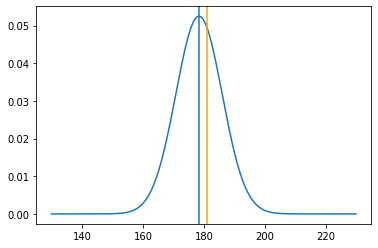

In [6]:
# Plot a normal distribution of heights with mean and standard deviation corresponding to the figure above

# Generate an x-vector with a range of heights in cm and 1 mm intervals
cm = np.arange(130, 230, 0.1)

# From figure (in normal distributions median, mean and mode are the same)
muM = 178.4 
# From the figure we also get the height one standard deviation away from the mean 
# From this, the standard deviation for males is
sigmaM = (186 - muM) 

# Rather than typing the full equation for the normal distribution (as we did in earlier chapters), 
# we can use functions to get its probability density function.
# For example norm in this library
from scipy.stats import norm

# Here loc refers to mean, and scale to standard deviation
pdf = norm.pdf(cm , loc = muM, scale = sigmaM) 

plt.plot(cm,pdf)

plt.axvline(muM, 0, 1) #plots the mean value as vertical line from 0 to 1
plt.axvline(181, 0, 1, c='orange') #plot the average male Dane height
plt.show()


The average male Dane height is slightly greater than the average male height in the above figure. From all these males, what is the probability to randomly pick a male who is 181 cm or taller?

Since the data is normally distributed, we do not need to have exact information about all males to answer this. **We can estimate the probability from the area under the Gaussian curve that interests us.** 

In the plot above, we used a probability density function, where the occurances are normalized. The total area under a standardized normal distribution is 1 and represents the probability of ALL male heights. 

Thus, the portion of the curve from 181 cm to the right tail corresponds to the probability of a male being 181 cm or taller.

In [15]:
# The cumulative distribution function of norm gives the area up until the given value (in this case 181 cm)
norm(loc = muM, scale = sigmaM).cdf(181)

print("p=")
# We get the probability of 181 cm or higher by subtracting the above from 1 (the probability of all heights)  
1- norm(loc = muM, scale = sigmaM).cdf(181)


p=


0.3661358383738287

So if we randomly select one male, the probability is close to 37% that he is 181 cm or taller.

Now we draw not just one person, but a *sample* of five persons and measure their heights: 180, 190, 188, 194 and 197 cm. 

In [11]:
height = pd.DataFrame([180, 190, 188, 194, 197], columns=(["Height"]))
# We can easily get information about the sample using .describe()
height.describe()

,Height
count,5.000000
mean,189.800000
std,6.496153
min,180.000000
25%,188.000000
50%,190.000000
75%,194.000000
max,197.000000


This sample was collected anonymously, and we do NOT know whether these heights correspond to males or females. But because we know heights are normally distributed, we can say something about the probability that this sample was drawn from male and female distributions respectively.

### Try out 2:
Compute the probability of randomly picking a person that is between 180-197 cm tall among males and females, respectively? 

In [17]:
# Like before, we can use the data in the figure
muF=164.7 # Female mean height from figure
sigmaF=(171.8-muF) # Female standard deviation from figure

# Then you will need to get the value from the cumulative distribution function
# Only this time you do it for two values that then should be subtracted.
# For males:
norm(loc = muM, scale = sigmaM).cdf(180)
norm(loc = muM, scale = sigmaM).cdf(197)

print("p_Male=")

print("p_Fem= ")


p_Male=
p_Fem= 


You should see that, on average, it is much more likely that the sample would come from male persons than females. Still, the probability of randomly drawing females within this range indicates that you are likely to do so more than 2 out of 100 times you draw a sample. 

So *how different* should the heights be before we can, with some certainity, conclude that it is UNLIKELY to be from the female distribution?

<a id= 'Significance'> </a>

## 3. Significantly different
In statistic jargon, we often hear that something is "significantly different" from something else. It may sound like something very fixed and certain but that is not really the case, it is still about probability.

A result is generally seen as being statistically significant from that predicted by the null hypothesis, when the *probability of obtaining it by random* is lower than a particular criteria. 

The "statistical signifcant level" of 0.05 (5% or 1/20) is a standard used for testing significance. The significance level is used to see if a score belongs to the outer "tail" of the normal distribution (at a distance of more than $1.96 * \sigma $ from the mean). If the score only has a 5% chance or less of occurring, it is considered to be so different from the expected value that the difference is significant.

For example, let's say that our sample of heights is so far out in the rightmost tail of the female distribution that the chance of it popping up by chance is less than 5%. Then it would make sense in rejecting the hypothesis that the sample is from (only) females, because it is much more likely that we would get this sample from the male heights distribution. 

### Try out 3:
Return to the probabilities you calculated in Try out 2. Would you say that *one, none or both* probabilities are lower than the 5% significance level?

<a id= 'Z-scores'> </a>

### 3.1 Z- Scores
A straight forward way of quickly testing whether a value is "far enough out" is to translate values into z-scores. We get the z-score by 
- deducting the population mean from each score 
- divide by the population standard deviation

$$z= \frac{x-\mu}{\sigma} $$

and this results in a dimensionless number that *reveals how far away from the mean the score is*. That is, just judging from the value, we can say if it is in the "common" (bell) or "unusual" (tail) part of the distribution. And since the values are standardized we can compare different z-scores as well.

Let us return to a randomly selected person with a height of 181 cm. What are the z-scores for the male and female distributions, respectively?

In [6]:
# Our data point
x=181

# Like before, we take Male and Female population mean and standard deviations from figure 
muM = 178.4 
sigmaM = (186 - muM)

# z-score in male distribution of heights
z_M=(x-muM)/sigmaM

print('z-score males:',z_M)

muF=164.7 #female mean height from figure
sigmaF=(171.8-muF) #female standard deviation from figure

# z-score in female distribution of heights
z_F=(x-muF)/sigmaF

print('z-score females:',z_F)

z-score males: 0.34210526315789425
z-score females: 2.295774647887318


The z-scores tell us that the same height is only 0.34 standard deviations away from the male mean (so clearly within the main bulk of the distribution of male heights), but 2.29 standard deviations away from the mean of female heights. That is (on average, across all these 20 countries where the data was collected) we are much less likely to meet a female person 181 cm tall. You can enter other heights and see how the z-scores change.

We can only really use z-scores if the *true mean and standard deviation are known*. Otherwise we need to estimate them. But hey, we have a good distribution very similar to the normal distribution except that it also compensates for small sample sizes: t-distribution!

<a id= 'SingleSampleTtest'> </a>

## 4 Single sample t-test 
In UX testing we might want to compare the results from our sample to a goal or bench mark. Do the ratings of our product show that we meet or exceed the goal set? 
For instance, the System Usability Scale (SUS) has been used extensively and there are industry averages that we can compare to. That is, we investigate whether usability ratings for our product result in a significantly different score compared to the reported industry average score for similar products.


We earlier saw that the t-distribution compensates for smaller sample sizes by having a slightly different shape. The t-statistic is calculated as:

$$t= \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

(You might recognize the standard error of the mean $\sigma_{\bar{x}}=\frac{s}{\sqrt{n}}$ in in the denominator.)

Unlike the z-score, we cannot conclude how far out in the tail this value is, without information about the degrees of freedom. But there are functions that will take care of that job for us. What we need to do, is be careful that we use them right.


<a id= 'OneTail'> </a>

### 4.1 One tail example 
As an example based on [Sauro & Lewis](https://books.google.dk/books?hl=en&lr=&id=USPfCQAAQBAJ&oi=fnd&pg=PP1&dq=Quantifying+the+User+Experience+Practical+Statistics+for+User+Research&ots=Vy_iZ_dmMj&sig=4VbjNb1uUOsABOLFmGGaqpziuLk&redir_esc=y#v=onepage&q=Quantifying%20the%20User%20Experience%20Practical%20Statistics%20for%20User%20Research&f=false) (Chapter 4, p. 48) we can take the responses from 20 users filling out the System Usability Scale (SUS). We would like to conclude whether the user's mean score is significantly *better* than the industry average SUS score for this product. In other words, did we do better in terms of usability?

Asking *"is it better?"* rather than *"is it a significant difference?"* means this is a directional *ONE TAILED TEST*. That is, we are interested whether the score is far enough out to the *right* tail, but do not really care whether it is in the leftmost tail. That means that our alpha level of significance will refer to an area corresponding to 5% of the total *IN ONE TAIL*. This means, in turn, that the cut-off point (critical value) will move a bit closer to the main bell of the curve, since the 5% will be all on one side.

Most researchers discourage doing one-tailed test and there are several reasons for that, but with respect to benchmark comparisons like this example, it does make sense. However, since the functions in several software packages does not automatically support one-tailed tests, one has to know how to deal with the output. 

In [27]:
# First we generate SUS scores corresponding to the Sauro & Lewis example:

mu = 67.0
alpha = 0.05

# We generate random normally distributed scores with
x_mean = 73 # sample mean
s = 19 # sample standard deviation
n = 20 # sample size

# We can do this using a function
scores = np.random.normal(x_mean,s,n)

# ...but note that these scores are randomly drawn, 
# and with small sample sizes of course the mean may also vary and not correspond to x_mean:
np.mean(scores)


75.22022542349006

In [28]:
# We proceed to test whether this is significantly different (with criteria 0.05) 
# scipy.stats has a function for one-sample t-test, note that this is *TWO TAILED*
t,p = stats.ttest_1samp(scores, mu)

# The t-statistic and probability for a *TWO TAILED TEST* 
print ('t_two_tailed:', round(t,2))
print ('p_two_tailed:',round(p,2))


t_two_tailed: 2.09
p_two_tailed: 0.05


This output tells us the t-statistic and the probability of randomly getting this mean by chance. 
If the probability is less than 5%, we say that it is significantly different from the industry average (= population mean). BUT since we are only interested in whether it is better, we can "put all our eggs" in that one tail:

<img src="https://upload.wikimedia.org/wikipedia/en/0/00/P-value_Graph.png" width="400">

...which in effect means dividing our p-value. But we can only do that if the t-statistic is in the right direction (that is > 0). 


In [29]:
# We explicitly wanted to see whether we *EXCEED* the bench mark (mu) 
# Since scipy does not provide one-tailed tests (any more) we can adjust by dividing p/2 

if (p/2 < alpha) and t > 0:
    print ('p/2:',p/2)
    print ('Reject Null Hypothesis for greater-than test')

# Rejecting the null hypothesis would mean saying that to obtain this value by chance is *unlikely*.

p/2: 0.025248240090518532
Reject Null Hypothesis for greater-than test


### Try out 4

Now go back, re-generate the scores and see how the p-value (and decision) changes. What can you conclude from this and the alpha level/criteria?

<a id= 'SmallSamples'> </a>

## 5 Binary Data and Small Samples

The previous examples have dealt with continous data. But what about discrete data? 

Let us say we have a small sample testing our product and we make note wether they all can manage the task they are asked to do using the product. We record whether the users completed the task successfully and this leads to binary discrete data that can take one of two values only (success/failure). 
We hope to use our data to conclude whether they support that at least 70% of all users can complete the same task. 

For larger sample sizes, these could be transformed into percentages that would enable us to use t-distribution or even z-score (if the average population completion rate is known). But for small sample sizes this will not give us a correct estimate. 

As Sauro & Lewis put it our sample size is small when we do not have at least 15 successes and 15 failures in the sample. For usability tests in the lab we often deal with samples smaller than 30 so we need another solution

<a id= 'Binomial'> </a>

### 5.1 Binomial probability

The binomial distribution shows the number of a specific outcome in relation to successful outcomes in 


This is typically demonstrated with coin flips, e.g. the number of k heads in n flips. 

The binomial distribution gives the probability of obtaining k heads in n flips (or k successes in a sample of n):

$$ p(k)= \frac{n!}{k!(n-k)!}p^x (1-p)^{n-k} $$

where $n!$ means "n factorial" and stands for $n \times (n-1)\times(n-2)\times ... \times 2\times 1$

For coin flipping, $p=0.5$ and so we can calculate the probability of getting 4 heads in 5 tosses


In [34]:
from scipy.stats import binom

# print the probability of obtaining 4 heads in 5 tosses
print(binom.pmf(k=4,n=5,p=0.5))

0.15624999999999994


The binomial distribution is used for discrete binary data (i.e. the outcome can be one of two values only). 

Even though the distribution itself is discrete and only exist for a specific number of values, the shape of the distribution comes closer and closer to that of a normal distributioon with increasing number of runs. You can try this out for yourself here:

https://www.fourmilab.ch/rpkp/experiments/pipeorgan/

<a id= 'TaskCompletionSmallSamples'> </a>

### 5.2 Task Completion for Small samples

We now return to the task completion as this is more relevant for our UX-purposes. 

With respect to task completion, we can now use the binomial distribution to find the probability of obtaining our observed data with the bench mark (or success criteria) p that at least 70% complete the task.
 
Let us find this probability for our observed data showing 8 out of 9 users successfully completing. 

- k = 8 (number of users successesfully completing the task)
- n = 9 (total number of users in the sample)
- p = 0.7 (success criteria)


What we want to find here is the probability that *eight or more* in our sample complete the task. We therefore use the binom function to give us the probability for both 8/9 and 9/9 and then we need to add these together.  

In [42]:

# The probability of 8/9 successful completions
p_8 = binom.pmf(k=8,n=9,p=0.7)

# The probability of 9/9 successful completions
p_9 = binom.pmf(k=9,n=9,p=0.7)

# We get the probability of exceeding the 70% success goal by subtracting the two added probabilies from 1
print('p exceeding 70% success rate:', 1-(p_8+p_9))


p exceeding 70% success rate: 0.8039967660000003


If this was a formative test, this result indicates that the task completion rate is ok and we can allocate resources to other more pressing problems.

<a id= 'AdjustedWald'> </a>

### 6 Adjusted Wald Confidence Intervals

Also for discrete binary data it is recommended to add confidence interval to our estimate. For small sample sizes, one should use the Adjusted-Wald where the adjusted probability 

$$ \hat{p}_{adj}= \frac{k+\frac{1.96^2}{2}}{n+1.96^2}$$

is added to the standard Wald formula for confidence intervals

$$ \hat{p}_{adj}\pm z_{(1-\frac{\alpha}{2})} \sqrt{\frac{\hat{p}_{adj}(1-\hat{p}_{adj})}{n_{adj}}}$$

where $n_{adj}=n+1.96^2$

Let us take an example with a small sample of users, where 7 out of 10 complete the task. What is the confidence interval for such a success rate?

In [20]:
# If 7 of 10 users completed task 

k=7
n=10

crit=1.96

# We can thus calculate n_adjusted as
n_adj= n+(crit ** 2)

# and p_adjusted as
p_adj= (k+((crit  ** 2)/2))/(n_adj)
p_adj



0.6444919662466767

In [90]:
# and then find the upper and lower confidence intervals by entering these

Wald_upper=p_adj + crit * np.sqrt((p_adj*(1-p_adj))/n_adj)
print('95% upper confidence limit:', round(Wald_upper,2))

Wald_lower=p_adj - crit * np.sqrt((p_adj*(1-p_adj))/n_adj)
print('95% lower confidence limit:', round(Wald_lower,2))

95% upper confidence limit: 0.9
95% lower confidence limit: 0.39


So we can be 95% confident that the true completion rate is somewhere in the interval 39-90%...not very impressive perhaps.

BUT perhaps we are too stringent with 95% confidence interval? We are once again interested in the one upper tail of the distribution, so we should adjust this in our confidence level. This means that rather than using 1.96 times the standard error, we now change this to 1.645. Similar to adjusting $\alpha / 2$ in the examples earlier, we adjust to one tail by settling for 90% confidence. This makes sense, because we do not require the limits to be so far away from the main bell as for the 95% confidence so the distance (measured in numbers of standard errors from the mean) is smaller.


### Try out 5

Copy the code above and changing so that you calculate  90% adjusted Wald confidence intervals 
for 18 of 20 users completing the task. 